# Composition, Polymorphism, and Magic Methods

Last week we looked at writing a point class and implementing a few methods.  This week, we are going to look at composition (in the context of a point pattern), polymorphism (by writing a simple average function), and magic methods (in the context of a point pattern).

## Magic Methods

In Python, classes can implement 'magic methods'.  These are the methods that add [syntax sugar](https://en.wikipedia.org/wiki/Syntactic_sugar) to your classes.  This allows you to do things like:

In [45]:
class Foo(object):
    def __init__(self, x):
        self.x = x
            
    def __lt__(self, other):
        return self.x < other.x
    
a = Foo(1)
b = Foo(2)

a < b

True

Lines 1 - 3 should look pretty familiar.  In line 5, a magic method `__lt__` (less than) is declared.  These magic methods take two arguments: (1) the standard `self` and `other` (just a convention), where `other` is another instance of some class.  I say some class because, if we assume that the classes are polymorphic (more below) then the only requirements is that both `self` and `other` have the same attribute.  Line 6 utilizes the basic less then comparitor.

In [71]:
class Foo(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
f1 = Foo(0,0)
f2 = Foo(1,1)
f3 = Foo(0,0)
f4 = Foo(2,3)
print('f1 equals f3? {}'.format(f1 == f3))
print('f1 equals f2? {}'.format(f1 == f2))

f1 equals f3? True
f1 equals f2? False


In the above class I added an `__eq__` method that is able to check if two instances of the class are coincident.  Additionally, I added an `__add__` method that will allow me to shift one instance of Foo using another instance of Foo.  Is that a good idea?  

Probably not.  Every time that I wanted to move Foo, I would need to create another instance of Foo.  That might be fine if we only ever work with a few hundred or thousand instances of Foo.  If we suddenly have 100,000 Foo objects, performance can get really bad.

Why then might I want to implement this functionality?

In [107]:
class Foo(object):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y  
    
    def __add__(self, other):
        return Foo(self.x + other.x, self.y + other.y)

    def __radd__(self, other):
        return Foo(self.x + other, self.y + other)
    
import random
foos = []
for i in range(10):
    foos.append(Foo(random.random(), random.random()))
print(foos[:5])  #Print the first 5 Foo objects

foos[0] + foos[1]

f = sum(foos)
print(f.x, f.y)

[<__main__.Foo object at 0x108b3f128>, <__main__.Foo object at 0x1071a4da0>, <__main__.Foo object at 0x1071a4d30>, <__main__.Foo object at 0x106b7fd68>, <__main__.Foo object at 0x12aa5fbe0>]
4.203392130983644 6.021351992373418


Here I have added a few more methods.

Line 7 add the magic method `__add__` that allows us to add two classes together.  That is `Foo + Foo` will now return a summation.  A bit of syntac sugar to avoid having to write `Foo.x + Foo.x` and `Foo.y + Foo.y`.  It is nice to use the built-in `sum`.  To do this, we also need to implement `__radd__` (reverse add), since we do not know the order that the addition will take place. 

You might notice that lines 8 and 11 return type `Foo`.  This is because addition traditionally returns a numeric type, not a tuple.  In fact, if you try to return a tuple (that is, `return self.x + other.x, self.y + other.y`), you will get an error.

Using the above example, can you image a way to compute the average `x` and `y` coordinates within a point pattern class using a bit of syntax sugar?

In [114]:
class Foo(object):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y  
    
    def __repr__(self):
        return """{}, {} \n""".format(self.x, self.y)
    
    def __add__(self, other):
        return Foo(self.x + other.x, self.y + other.y)

    def __radd__(self, other):
        return Foo(self.x + other, self.y + other)
    
import random
foos = []
for i in range(10):
    foos.append(Foo(random.random(), random.random()))
print(foos[:5])  #Print the first 5 Foo objects

foos[0] + foos[1]

f = sum(foos)
print(f)

[0.2678526834598254, 0.6468228660546533 
, 0.9784540929749495, 0.6634830601808944 
, 0.35210924933619114, 0.2363336463904232 
, 0.9890096138924438, 0.9351983288435207 
, 0.40441256080414645, 0.8853452411356617 
]
5.472358343232224, 6.229480482299518 



One final example.  Here I added a magic method, `__repr__`.  This is the representation of the class when we print it.  Notice how line 25 can now just print `f`.  This makes a call to `__repr__` and returns the x, y coordinates of the sum of the points.

For a bit more information about magic methods and a listing of available magic methods, check out: http://www.rafekettler.com/magicmethods.html

## Polymorphism

In [123]:
class Bar(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
f = Foo(3, 4)
b = Bar(2.2, 4)

f + b # This only works in this order because Bar does not define a __add__ magic method.

5.2, 8 

A totally contrived example.  Imagine that I have a different class Bar that has `x` and `y` attributes.  I can leverage the polymorphic nature of `Foo` and `Bar` and allow the `__add__` magic method defined within `Foo` work with `Bar` objects.  That is, `Foo` has an interface that also happend to support `Bar`.   This leads directly to the idea of [duck typing](https://en.wikipedia.org/wiki/Duck_typing).  

<center><h4>If it looks like a duck and quacks like a duck, it's a duck!</h4></center>

<img src='images/duck.jpg' /img>
Image from: https://www.toptal.com/python/python-design-patterns

As the complexity of the code scales, we can start to define interfaces, instead of designing implementations.  The general idea is to always try and reduce complexity.

Polymorphism is not limited to just interface definition.  Polymorphic can also describe a function able to handle inputs of different types.  The `multiply` operator is a prime example.

In [126]:
from operator import mul as multiply

print(multiply('a', 2))
print(multiply(2.0, -1))

aa
-2.0


Above I import the multiply operator (`*`) as a function (instead of the syntax sugar representation).  Lines 3 and 4 demonstrate how the multiple operation is polymorphic.  The function supports multiplication of `int`, `float` and `str` types.

## Composition
The readings also touched on inheritance, but I did not have you write any code leveraging the inheritance paradigm.  This was intentional, as the vast majority of the time, you do not want to utilize inheritance.  The complexity of the resultant code can quickly spiral out of control.

One method to avoid inheritance is composition.  The readings do a fine job looking at composition in the context of a deck of cards.  

Checkout this video (up to ~3:45) for a (comedic) description of why composition is prefered over inheretance.

In [40]:
from IPython.display import YouTubeVideo
YouTubeVideo('wfMtDGfHWpA')

Just like a deck of cards is composed of individual cards, a point pattern can be composed of individual points.  Here is an example definition of a GroupOfFoos:

In [129]:
class GroupOfFoos(object):
    def __init__(self):
        self.foos = []
        
    def add_foo(self, foo):
        self.foos.append(foo)
        
    def remove_foo(self, index):
        try:
            del(self.foos[index])
        except IndexError:
            print('Index {} not in list'.format(index))

g = GroupOfFoos()
for i in range(10):
    g.add_foo(Foo(random.random(), random.random()))
    
print(g)
print(g.foos)  # Remember that the Foos object has a __repr__ defined.

[0.04037560677093355, 0.5441497683608197 
, 0.5451802864321509, 0.8926015878452562 
, 0.6571138202605632, 0.546172334555684 
, 0.7652677780165273, 0.9465525758547306 
, 0.7787402960693032, 0.18914850976043152 
, 0.43096145362037275, 0.39962449626779983 
, 0.42365022043838496, 0.40930623023548796 
, 0.27973801396494047, 0.8305216361772596 
, 0.34060363556013074, 0.9830810479601932 
, 0.8682128803717428, 0.17934093092107484 
]


# Week 8 Deliverables (E6) - Due 3/22/16
For this week make sure that you have completed the following:
    
   
* Fork Assignment 7 to your own github repository.
    * You can access assignment 7 [HERE](https://github.com/Geospatial-Python/assignment_07)
* Clone the repository locally

## Deliverables
1. Update your Point class to utilize at least 3 magic methods.  You are free to choose what magic methods to implement.  Be sure to write a test for each magic method that you implement.  In fact, write the test first, then write the magic method.
1. Create a PointPattern class.  This class should be able to compute statistics about your point pattern.  It should be able to:
    * Average nearest neighbor distance (with or without mark specification)
    * Number of coincident points
    * List the marks, for example if the points are marked 'r' and 'b', this should return ['r', 'b']
    * Return a subset of points by mark type
    * Generate $n$ random points where $n$ is either provided by the user or equal to the current size of the point pattern.
    * Generate $k$ realizations of random points.  That is, simulate $k$ random point patterns for use in Monte Carlo simulation.
    * Return the critical points from the nearest neighbor simulation
1. Add the ability to compute a G function on the point pattern class (more below).
    * The point pattern has a method to compute the observed G function (`compute_g` maybe)
    * The method should take a single argument, `nsteps`.  This is the number of discrete $d$ that are used to compute $\hat{G}(d)$.
    * Hint: You can get a range of d to iterate over using something like
 
    ```python
    import numpy as np 
    ds = np.linspace(some_min_distance, some_max_distance, nsteps)
    ```
    
    we will look more a using numpy later, for now though, this should work to get you a float range to test.

### The G Function

Formally, the G Function is defined as:

## $\hat{G}(d) = \frac{\sum_{i=0}^n[d_{min}(o_{i}) \le d]}{N}$

where, $d_min$ is the minimum distance between observation ($o$) $i$ and all other observations, bracket (Iverson) notation indicates a count, and $d$ is a user specified distance, and $N$ is the number of observations.  Plainly, the G Function requires that the user identify some number of distance bands.  The more distance bands, the (potentially) more continious the G-Function will look.  For each distance band, a count os perfored, for the number of observations that have a nearest neighbor within that distance.  The count is then divided by the number of observations and the next distance band is checked.

Populating the interactive namespace from numpy and matplotlib


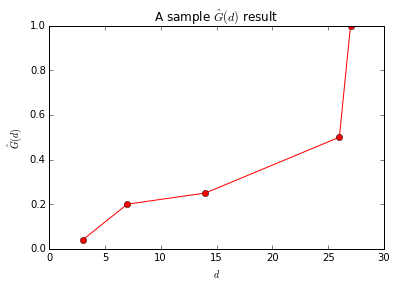

In [9]:
# Sample G(d) result
%pylab inline

gd = [0.04, 0.2, 0.25, 0.5, 1.0]
d = [3, 7, 14, 26, 27 ]
plot(d, gd, 'ro-')
xlabel(r'$d$')
ylabel(r'$\hat{G}(d)$')
title(r'A sample $\hat{G}(d)$ result')

Above is a sample $G(d)$ result.  The variable `gd` stores result of the above equation for each discrete $d$.  The variable $d$ holds the distances at which the equation was computed.

If you have any questions about this, please post in the forums!